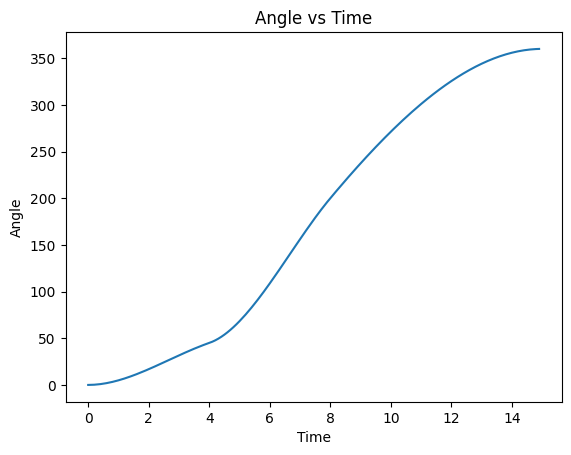

In [7]:
import numpy as np
import matplotlib.pyplot as plt

ang = [0, 45, 200, 360]                          #added way points between angles 0 and 360
time = [0, 4, 8, 15]                            #time at which the angles need to be reached

def coef_cubic(ang, time) :
    coef = []
    v = 0
    for i in range(len(ang)-1) :
        v1 = v
        v = ((ang[i+1]- ang[i])/(time[i+1] - time[i]))
        if i == len(ang)- 2 :
            v = 0
        t1 = time[i]
        t2 = time[i+1]
        a = np.array([[t1*t1*t1, t1*t1, t1, 1], [t2*t2*t2, t2*t2, t2, 1], [3*t1*t1, 2*t1, 1, 0], [3*t2*t2, 2*t2, 1, 0]])
        b = np.array([ang[i], ang[i+1], v1, v])
        coef.append(np.linalg.solve(a,b))
    return coef

coef = coef_cubic(ang, time)
def f(coef,i , t):
    return t*t*t*coef[i][0] + t*t*coef[i][1] + t*coef[i][2] + coef[i][3]
theta = []
i=0
for t in time[1:] :
    for time_int in np.arange(time[i], time[i+1], 0.1):
        theta.append(f(coef, i, time_int))
    i += 1
plt.plot(np.arange(0, time[-1], 0.1),theta)
plt.xlabel("Time")
plt.ylabel("Angle")
plt.title("Angle vs Time")
plt.show()